이 데이터는 미국 인구조사국의 데이터베이스에서 가져온 데이터로, 
1996년도에 사람들의 특징과 그 사람의 임금이 50k를 넘는지를 가지고 있는 데이터이다.

사람들의 특징은 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country'가 있으며, 이 특징을 가지고 그 사람의 임금이 50k를 넘기는 지 알고자 한다.

In [245]:
import pandas as pd
import numpy as np
import re

columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','50k']
df = pd.read_csv('adult.data',names=columns,index_col=False)
df2=df.replace(' ?',np.NaN)
df2.tail(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [152]:
import pandas as pd
import numpy as np
import re

columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','50k']
df_test = pd.read_csv('adult.test',names=columns,index_col=False)
df2_test=df_test.replace(' ?',np.NaN)
df2_test.tail(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [250]:
df2.shape

(32561, 15)

In [6]:
f = open('adult.names','r')
line= f.readlines()
line

['| This data was extracted from the census bureau database found at\n',
 '| http://www.census.gov/ftp/pub/DES/www/welcome.html\n',
 '| Donor: Ronny Kohavi and Barry Becker,\n',
 '|        Data Mining and Visualization\n',
 '|        Silicon Graphics.\n',
 '|        e-mail: ronnyk@sgi.com for questions.\n',
 '| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).\n',
 '| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)\n',
 '| 45222 if instances with unknown values are removed (train=30162, test=15060)\n',
 '| Duplicate or conflicting instances : 6\n',
 '| Class probabilities for adult.all file\n',
 "| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)\n",
 "| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)\n",
 '|\n',
 '| Extraction was done by Barry Becker from the 1994 Census database.  A set of\n',
 '|   reasonably clean records was extracted using the following conditions:\n',
 '|   ((AAGE>16) && (AG

In [246]:
df2.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
50k                  0
dtype: int64

정답 데이터에 불균형이 있다.

In [251]:
df2['50k'].value_counts()

 <=50K    24720
 >50K      7841
Name: 50k, dtype: int64

In [252]:
t_dum= pd.get_dummies(df2['50k'],drop_first = True)
t_dum

,>50K
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [253]:
df3 = df2.drop(['50k'],axis = 1)
df3 = pd.concat([df3,t_dum],axis = 1)
df3

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [255]:
t_dum= pd.get_dummies(df2_test['50k'],drop_first = True)
t_dum

,>50K.
0,0
1,0
2,0
3,1
4,1
...,...
16277,0
16278,0
16279,0
16280,0


In [256]:
df3_test = df2_test.drop(['50k'],axis = 1)
df3_test = pd.concat([df3_test,t_dum],axis = 1)
df3_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K.
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,0
16278,64,Private,321403.0,HS-grad,9.0,Widowed,Craft-repair,Other-relative,Black,Male,0.0,0.0,40.0,United-States,0
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,0
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,0


learn 함수의 정의


In [216]:
from sklearn.model_selection import train_test_split
from sklearn import tree

def learn(x_train,y_train,x_test,y_test,depth=10):
    
    model = tree.DecisionTreeClassifier(max_depth = depth, random_state = 0)
    
    model.fit(x_train,y_train)
    
    score = model.score(X = x_train, y=y_train)
    score2 = model.score(X = x_test, y=y_test)    
    
    return round(score,3), round(score2,3), model

수치 데이터만 가지고 분석했을 때

In [265]:
col =['age','fnlwgt','capital-gain','capital-loss','hours-per-week',' >50K']
col2 =['age','fnlwgt','capital-gain','capital-loss','hours-per-week',' >50K.']

df4_test = df3_test[col2].dropna()
print(df4_test)
print(df4_test.isnull().sum())
df4=df3[col]
print(df4)

print(df4.isnull().sum())

      age    fnlwgt  capital-gain  capital-loss  hours-per-week   >50K.
1      25  226802.0           0.0           0.0            40.0       0
2      38   89814.0           0.0           0.0            50.0       0
3      28  336951.0           0.0           0.0            40.0       1
4      44  160323.0        7688.0           0.0            40.0       1
5      18  103497.0           0.0           0.0            30.0       0
...    ..       ...           ...           ...             ...     ...
16277  39  215419.0           0.0           0.0            36.0       0
16278  64  321403.0           0.0           0.0            40.0       0
16279  38  374983.0           0.0           0.0            50.0       0
16280  44   83891.0        5455.0           0.0            40.0       0
16281  35  182148.0           0.0           0.0            60.0       1

[16281 rows x 6 columns]
age               0
fnlwgt            0
capital-gain      0
capital-loss      0
hours-per-week    0
 >50K.    

In [226]:
s1,s2,model=learn(df4.iloc[:,:-1],df4.iloc[:,-1],df4_test.iloc[:,:-1],df4_test.iloc[:,-1],6)
print(s1,'\n',s2)

0.824 
 0.824


a

결손값을 최빈값을 넣어 해주었을때

education, 50k로 피벗테이블을 만든 뒤에 workclass을 최빈값으로 넣어준다.

In [228]:
gd = df2.groupby(['education','50k'])

work_pibot=[]
for temp_df in gd:
    
    temp=temp_df[1]['workclass'].mode()
    key = temp_df[0]
    value = temp[0]
    work_pibot.append((key,value))
    
work_pibot

[((' 10th', ' <=50K'), ' Private'),
 ((' 10th', ' >50K'), ' Private'),
 ((' 11th', ' <=50K'), ' Private'),
 ((' 11th', ' >50K'), ' Private'),
 ((' 12th', ' <=50K'), ' Private'),
 ((' 12th', ' >50K'), ' Private'),
 ((' 1st-4th', ' <=50K'), ' Private'),
 ((' 1st-4th', ' >50K'), ' Private'),
 ((' 5th-6th', ' <=50K'), ' Private'),
 ((' 5th-6th', ' >50K'), ' Private'),
 ((' 7th-8th', ' <=50K'), ' Private'),
 ((' 7th-8th', ' >50K'), ' Private'),
 ((' 9th', ' <=50K'), ' Private'),
 ((' 9th', ' >50K'), ' Private'),
 ((' Assoc-acdm', ' <=50K'), ' Private'),
 ((' Assoc-acdm', ' >50K'), ' Private'),
 ((' Assoc-voc', ' <=50K'), ' Private'),
 ((' Assoc-voc', ' >50K'), ' Private'),
 ((' Bachelors', ' <=50K'), ' Private'),
 ((' Bachelors', ' >50K'), ' Private'),
 ((' Doctorate', ' <=50K'), ' Private'),
 ((' Doctorate', ' >50K'), ' Private'),
 ((' HS-grad', ' <=50K'), ' Private'),
 ((' HS-grad', ' >50K'), ' Private'),
 ((' Masters', ' <=50K'), ' Private'),
 ((' Masters', ' >50K'), ' Private'),
 ((' Pr

In [120]:
gd = df2.groupby(['education','50k'])

occ_pibot=[]
for temp_df in gd:
    
    temp=temp_df[1]['occupation'].mode()
    key = temp_df[0]
    value = temp[0]
    occ_pibot.append((key,value))
    
occ_pibot

[((' 10th', ' <=50K'), ' Other-service'),
 ((' 10th', ' >50K'), ' Craft-repair'),
 ((' 11th', ' <=50K'), ' Other-service'),
 ((' 11th', ' >50K'), ' Craft-repair'),
 ((' 12th', ' <=50K'), ' Other-service'),
 ((' 12th', ' >50K'), ' Craft-repair'),
 ((' 1st-4th', ' <=50K'), ' Other-service'),
 ((' 1st-4th', ' >50K'), ' Craft-repair'),
 ((' 5th-6th', ' <=50K'), ' Other-service'),
 ((' 5th-6th', ' >50K'), ' Craft-repair'),
 ((' 7th-8th', ' <=50K'), ' Craft-repair'),
 ((' 7th-8th', ' >50K'), ' Craft-repair'),
 ((' 9th', ' <=50K'), ' Other-service'),
 ((' 9th', ' >50K'), ' Craft-repair'),
 ((' Assoc-acdm', ' <=50K'), ' Adm-clerical'),
 ((' Assoc-acdm', ' >50K'), ' Exec-managerial'),
 ((' Assoc-voc', ' <=50K'), ' Craft-repair'),
 ((' Assoc-voc', ' >50K'), ' Craft-repair'),
 ((' Bachelors', ' <=50K'), ' Prof-specialty'),
 ((' Bachelors', ' >50K'), ' Exec-managerial'),
 ((' Doctorate', ' <=50K'), ' Prof-specialty'),
 ((' Doctorate', ' >50K'), ' Prof-specialty'),
 ((' HS-grad', ' <=50K'), ' Craft

In [148]:
import pandas as pd
import numpy as np
import re

columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','50k']
df_test = pd.read_csv('adult.test',names=columns,index_col=False)
df2_test=df_test.replace(' ?',np.NaN)
df2_test.tail(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [131]:
is_null_work = df2['workclass'].isnull()
is_null_occ = df2['occupation'].isnull()

for row in work_pibot:
    df2.loc[(df['education']==row[0][0])&(df['50k']==row[0][1])&is_null_work,'workclass']=row[1]

for row in occ_pibot:
    df2.loc[(df['education']==row[0][0])&(df['50k']==row[0][1])&is_null_occ,'occupation']=row[1]


In [132]:
df2.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    583
50k                 0
dtype: int64

In [134]:
t

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: 50k, Length: 32561, dtype: object

In [137]:
t_dum= pd.get_dummies(t,drop_first = True)
t_dum

,>50K
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [76]:
df2_test.isnull().sum()

age                 0
workclass         964
fnlwgt              1
education           1
education-num       1
marital-status      1
occupation        967
relationship        1
race                1
sex                 1
capital-gain        1
capital-loss        1
hours-per-week      1
native-country    275
50k                 1
dtype: int64

In [230]:
gd = df2_test.groupby(['education','50k'])

work_pibot_test=[]
for temp_df in gd:
    
    temp=temp_df[1]['workclass'].mode()
    key = temp_df[0]
    value = temp[0]
    work_pibot_test.append((key,value))
    
work_pibot_test

[((' 10th', ' <=50K.'), ' Private'),
 ((' 10th', ' >50K.'), ' Private'),
 ((' 11th', ' <=50K.'), ' Private'),
 ((' 11th', ' >50K.'), ' Private'),
 ((' 12th', ' <=50K.'), ' Private'),
 ((' 12th', ' >50K.'), ' Private'),
 ((' 1st-4th', ' <=50K.'), ' Private'),
 ((' 1st-4th', ' >50K.'), ' Private'),
 ((' 5th-6th', ' <=50K.'), ' Private'),
 ((' 5th-6th', ' >50K.'), ' Private'),
 ((' 7th-8th', ' <=50K.'), ' Private'),
 ((' 7th-8th', ' >50K.'), ' Private'),
 ((' 9th', ' <=50K.'), ' Private'),
 ((' 9th', ' >50K.'), ' Private'),
 ((' Assoc-acdm', ' <=50K.'), ' Private'),
 ((' Assoc-acdm', ' >50K.'), ' Private'),
 ((' Assoc-voc', ' <=50K.'), ' Private'),
 ((' Assoc-voc', ' >50K.'), ' Private'),
 ((' Bachelors', ' <=50K.'), ' Private'),
 ((' Bachelors', ' >50K.'), ' Private'),
 ((' Doctorate', ' <=50K.'), ' Private'),
 ((' Doctorate', ' >50K.'), ' Private'),
 ((' HS-grad', ' <=50K.'), ' Private'),
 ((' HS-grad', ' >50K.'), ' Private'),
 ((' Masters', ' <=50K.'), ' Private'),
 ((' Masters', ' >50

In [229]:
gd = df2_test.groupby(['education','50k'])

occ_pibot_test=[]
for temp_df in gd:
    
    temp=temp_df[1]['occupation'].mode()
    key = temp_df[0]
    value = temp[0]
    occ_pibot_test.append((key,value))
    
occ_pibot_test

[((' 10th', ' <=50K.'), ' Other-service'),
 ((' 10th', ' >50K.'), ' Transport-moving'),
 ((' 11th', ' <=50K.'), ' Other-service'),
 ((' 11th', ' >50K.'), ' Craft-repair'),
 ((' 12th', ' <=50K.'), ' Other-service'),
 ((' 12th', ' >50K.'), ' Craft-repair'),
 ((' 1st-4th', ' <=50K.'), ' Farming-fishing'),
 ((' 1st-4th', ' >50K.'), ' Adm-clerical'),
 ((' 5th-6th', ' <=50K.'), ' Machine-op-inspct'),
 ((' 5th-6th', ' >50K.'), ' Exec-managerial'),
 ((' 7th-8th', ' <=50K.'), ' Other-service'),
 ((' 7th-8th', ' >50K.'), ' Craft-repair'),
 ((' 9th', ' <=50K.'), ' Craft-repair'),
 ((' 9th', ' >50K.'), ' Craft-repair'),
 ((' Assoc-acdm', ' <=50K.'), ' Adm-clerical'),
 ((' Assoc-acdm', ' >50K.'), ' Exec-managerial'),
 ((' Assoc-voc', ' <=50K.'), ' Craft-repair'),
 ((' Assoc-voc', ' >50K.'), ' Craft-repair'),
 ((' Bachelors', ' <=50K.'), ' Prof-specialty'),
 ((' Bachelors', ' >50K.'), ' Exec-managerial'),
 ((' Doctorate', ' <=50K.'), ' Prof-specialty'),
 ((' Doctorate', ' >50K.'), ' Prof-specialty')

In [235]:
is_null_work = df2_test['workclass'].isnull()
is_null_occ = df2_test['occupation'].isnull()

for row in work_pibot_test:
    df2_test.loc[(df2_test['education']==row[0][0])&(df2_test['50k']==row[0][1])&is_null_work,'workclass']=row[1]

for row in occ_pibot_test:
    df2_test.loc[(df2_test['education']==row[0][0])&(df2_test['50k']==row[0][1])&is_null_occ,'occupation']=row[1]


In [236]:
df2_test.isnull().sum()

age                 0
workclass           1
fnlwgt              1
education           1
education-num       1
marital-status      1
occupation          1
relationship        1
race                1
sex                 1
capital-gain        1
capital-loss        1
hours-per-week      1
native-country    275
50k                 1
dtype: int64

In [242]:
df3_test=df2_test.drop('native-country',axis=1).dropna()

In [244]:
df3_test.shape

(16281, 14)

In [259]:
df3_work= pd.get_dummies(df3[['workclass']],drop_first = True)
df3_work

,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0
32557,0,0,1,0,0,0,0
32558,0,0,1,0,0,0,0
32559,0,0,1,0,0,0,0


In [366]:
df3_edu= pd.get_dummies(df3[['education']],drop_first = True)
df3_mar= pd.get_dummies(df3[['marital-status']],drop_first = True)
df3_rel= pd.get_dummies(df3[['relationship']],drop_first = True)
df3_race= pd.get_dummies(df3[['race']],drop_first = True)
df3_sex= pd.get_dummies(df3[['sex']],drop_first = True)
df3_nat= pd.get_dummies(df3[['native-country']],drop_first = True)

In [367]:
t_df3_work= pd.get_dummies(df3_test[['workclass']],drop_first = True)
t_df3_edu= pd.get_dummies(df3_test[['education']],drop_first = True)
t_df3_mar= pd.get_dummies(df3_test[['marital-status']],drop_first = True)
t_df3_rel= pd.get_dummies(df3_test[['relationship']],drop_first = True)
t_df3_race= pd.get_dummies(df3_test[['race']],drop_first = True)
t_df3_sex= pd.get_dummies(df3_test[['sex']],drop_first = True)
t_df3_nat= pd.get_dummies(df3_test[['native-country']],drop_first = True)

In [368]:
df3_dum = pd.concat([df3_work,df3_edu,df3_rel,df3_race,df3_sex],axis=1)
t_df3_dum = pd.concat([t_df3_work,t_df3_edu,t_df3_rel,t_df3_race,t_df3_sex],axis=1)

In [282]:
print(df3_dum.shape)
print(t_df3_dum.shape)

(32561, 32)
(16282, 32)


In [306]:
df5=pd.concat([df4,df3_dum],axis=1)
df5_test = pd.concat([df4_test,t_df3_dum],axis=1)
df5_test=df5_test.dropna()

temp=df5[' >50K']
df6=df5.drop([' >50K'],axis=1)
df6=pd.concat([df6,temp],axis=1)

temp=df5_test[' >50K.']
df6_test=df5_test.drop([' >50K.'],axis=1)
df6_test=pd.concat([df6_test,temp],axis=1)

In [309]:
s1,s2,model_d=learn(df6.iloc[:,:-1],df6.iloc[:,-1],df6_test.iloc[:,:-1],df6_test.iloc[:,-1],10)
print(s1,'\n',s2)

0.855 
 0.842


In [297]:
s1,s2,model=learn(df4.iloc[:,:-1],df4.iloc[:,-1],df4_test.iloc[:,:-1],df4_test.iloc[:,-1],10)
print(s1,'\n',s2)

0.829 
 0.823


In [318]:
df6.columns

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'sex_ Male', ' >50K'],
      dtype='object')

In [313]:
np.array(model_d.feature_importances_)

array([1.86433549e-01, 1.66614737e-02, 3.57388349e-01, 1.46637135e-01,
       5.31893366e-02, 2.07933260e-03, 0.00000000e+00, 2.61773677e-03,
       6.84167901e-04, 4.90800466e-03, 1.30094307e-03, 0.00000000e+00,
       0.00000000e+00, 3.20560395e-04, 3.53716315e-04, 9.25173661e-04,
       1.65244607e-04, 0.00000000e+00, 5.87694057e-04, 2.74298582e-04,
       4.78580806e-02, 2.47472623e-02, 2.16796604e-03, 4.51793648e-02,
       3.91836079e-04, 2.74215031e-02, 1.36611335e-03, 3.85859735e-04,
       1.62263779e-03, 0.00000000e+00, 1.23703523e-03, 7.30956243e-02])

In [319]:
pd.DataFrame(model.feature_importances_,index=df6.columns[:-1])

,0
age,0.186434
fnlwgt,0.016661
capital-gain,0.357388
capital-loss,0.146637
hours-per-week,0.053189
workclass_ Local-gov,0.002079
workclass_ Never-worked,0.000000
workclass_ Private,0.002618
workclass_ Self-emp-inc,0.000684
workclass_ Self-emp-not-inc,0.004908


In [320]:
df3_dum = pd.concat([df3_edu,df3_sex],axis=1)
t_df3_dum = pd.concat([t_df3_edu,t_df3_sex],axis=1)

In [321]:
print(df3_dum.shape)
print(t_df3_dum.shape)

(32561, 16)
(16282, 16)


In [324]:
df5=pd.concat([df4,df3_dum],axis=1)
df5_test = pd.concat([df4_test,t_df3_dum],axis=1)
df5_test=df5_test.dropna()

temp=df5[' >50K']
df6=df5.drop([' >50K'],axis=1)
df6=pd.concat([df6,temp],axis=1)

temp=df5_test[' >50K.']
df6_test=df5_test.drop([' >50K.'],axis=1)
df6_test=pd.concat([df6_test,temp],axis=1)

In [327]:
s1,s2,model_d=learn(df6.iloc[:,:-1],df6.iloc[:,-1],df6_test.iloc[:,:-1],df6_test.iloc[:,-1],10)
print(s1,'\n',s2)

0.853 
 0.841


In [326]:
s1,s2,model=learn(df4.iloc[:,:-1],df4.iloc[:,-1],df4_test.iloc[:,:-1],df4_test.iloc[:,-1],10)
print(s1,'\n',s2)

0.829 
 0.823


In [328]:
df3_dum = pd.concat([df3_edu],axis=1)
t_df3_dum = pd.concat([t_df3_edu],axis=1)

In [329]:
print(df3_dum.shape)
print(t_df3_dum.shape)

(32561, 15)
(16282, 15)


In [330]:
df5=pd.concat([df4,df3_dum],axis=1)
df5_test = pd.concat([df4_test,t_df3_dum],axis=1)
df5_test=df5_test.dropna()

temp=df5[' >50K']
df6=df5.drop([' >50K'],axis=1)
df6=pd.concat([df6,temp],axis=1)

temp=df5_test[' >50K.']
df6_test=df5_test.drop([' >50K.'],axis=1)
df6_test=pd.concat([df6_test,temp],axis=1)

In [331]:
s1,s2,model_d=learn(df6.iloc[:,:-1],df6.iloc[:,-1],df6_test.iloc[:,:-1],df6_test.iloc[:,-1],10)
print(s1,'\n',s2)

0.846 
 0.835


In [332]:
df3_dum = pd.concat([df3_sex],axis=1)
t_df3_dum = pd.concat([t_df3_sex],axis=1)

In [333]:
df5=pd.concat([df4,df3_dum],axis=1)
df5_test = pd.concat([df4_test,t_df3_dum],axis=1)
df5_test=df5_test.dropna()

temp=df5[' >50K']
df6=df5.drop([' >50K'],axis=1)
df6=pd.concat([df6,temp],axis=1)

temp=df5_test[' >50K.']
df6_test=df5_test.drop([' >50K.'],axis=1)
df6_test=pd.concat([df6_test,temp],axis=1)

In [334]:
s1,s2,model_d=learn(df6.iloc[:,:-1],df6.iloc[:,-1],df6_test.iloc[:,:-1],df6_test.iloc[:,-1],10)
print(s1,'\n',s2)

0.833 
 0.822


----------------------------

In [335]:
df3_dum = pd.concat([df3_edu,df3_sex],axis=1)
t_df3_dum = pd.concat([t_df3_edu,t_df3_sex],axis=1)

In [336]:
print(df3_dum.shape)
print(t_df3_dum.shape)

(32561, 16)
(16282, 16)


In [345]:
df5=pd.concat([df4,df3_dum],axis=1)
df5_test = pd.concat([df4_test,t_df3_dum],axis=1)
df5_test=df5_test.dropna()

temp=df5[' >50K']
df6=df5.drop([' >50K'],axis=1)
df6=pd.concat([df6,temp],axis=1)

temp=df5_test[' >50K.']
df6_test=df5_test.drop([' >50K.'],axis=1)
df6_test=pd.concat([df6_test,temp],axis=1)

In [346]:
s1,s2,model_d=learn(df6.iloc[:,:-1],df6.iloc[:,-1],df6_test.iloc[:,:-1],df6_test.iloc[:,-1],3)
print(s1,'\n',s2)

0.818 
 0.818


[Text(697.5, 792.75, 'capital-gain <= 5119.0\ngini = 0.366\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(348.75, 566.25, 'age <= 29.5\ngini = 0.326\nsamples = 30983\nvalue = [24638, 6345]'),
 Text(174.375, 339.75, 'age <= 25.5\ngini = 0.085\nsamples = 9612\nvalue = [9185, 427]'),
 Text(87.1875, 113.25, 'gini = 0.027\nsamples = 6377\nvalue = [6290, 87]'),
 Text(261.5625, 113.25, 'gini = 0.188\nsamples = 3235\nvalue = [2895, 340]'),
 Text(523.125, 339.75, 'capital-loss <= 1820.5\ngini = 0.4\nsamples = 21371\nvalue = [15453, 5918]'),
 Text(435.9375, 113.25, 'gini = 0.381\nsamples = 20482\nvalue = [15240, 5242]'),
 Text(610.3125, 113.25, 'gini = 0.364\nsamples = 889\nvalue = [213, 676]'),
 Text(1046.25, 566.25, 'capital-gain <= 7073.5\ngini = 0.099\nsamples = 1578\nvalue = [82, 1496]'),
 Text(871.875, 339.75, 'capital-gain <= 5316.5\ngini = 0.453\nsamples = 179\nvalue = [62, 117]'),
 Text(784.6875, 113.25, 'gini = 0.0\nsamples = 97\nvalue = [0, 97]'),
 Text(959.0625, 113.25, 'gini = 0.3

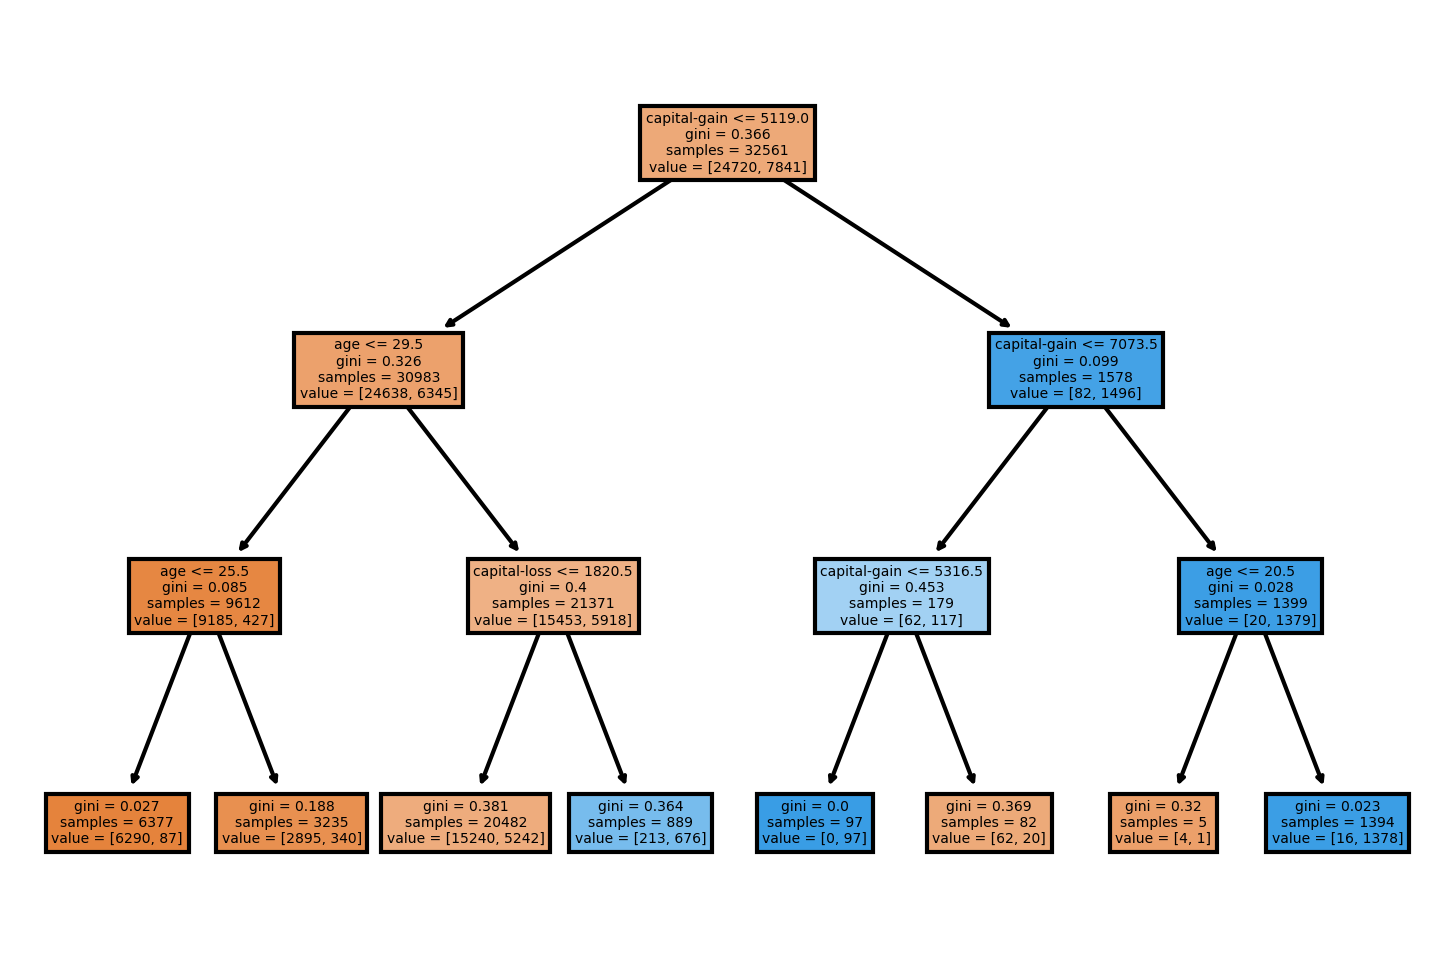

In [347]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(dpi=300)
plot_tree(model_d,feature_names = df6.columns[:-1],filled = True)

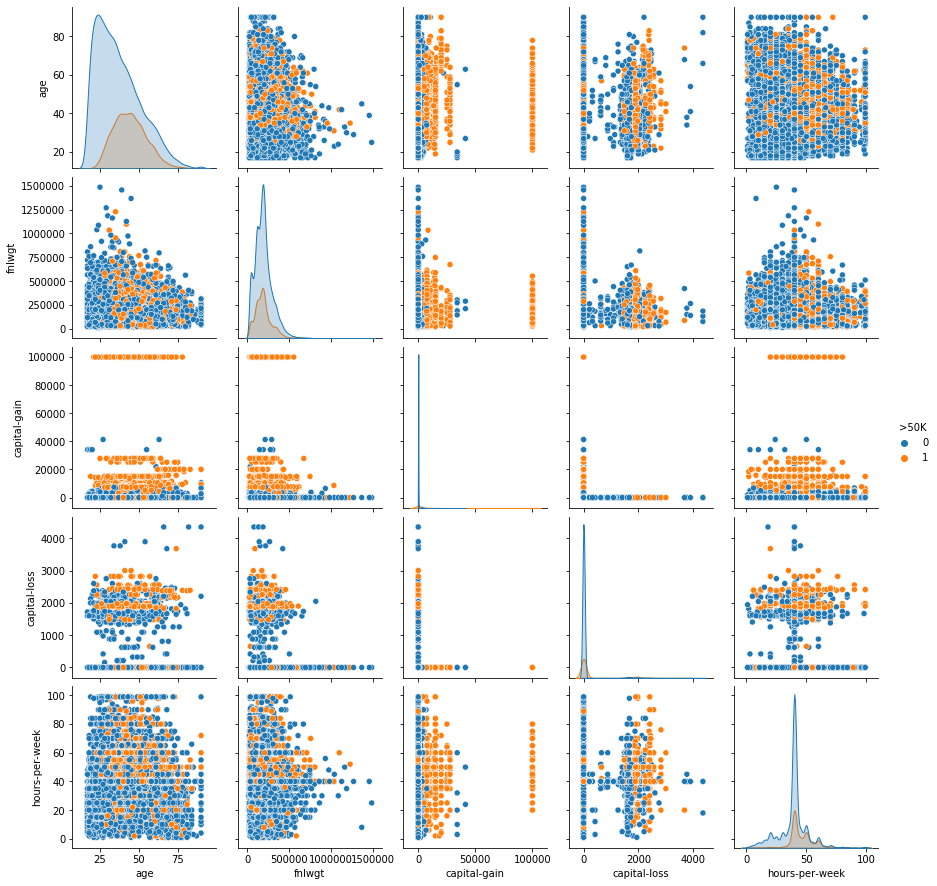

In [348]:
import seaborn as sns
col =['age','fnlwgt','capital-gain','capital-loss','hours-per-week',' >50K']
col2 =['age','fnlwgt','capital-gain','capital-loss','hours-per-week',' >50K.']

sns.pairplot(vars=col[:-1], data=df4, hue=col[-1])

In [363]:
df4_test=df4_test.astype(int)
df4_test

In [364]:
df4_test.dtypes

age               int64
fnlwgt            int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
 >50K.            int64
dtype: object

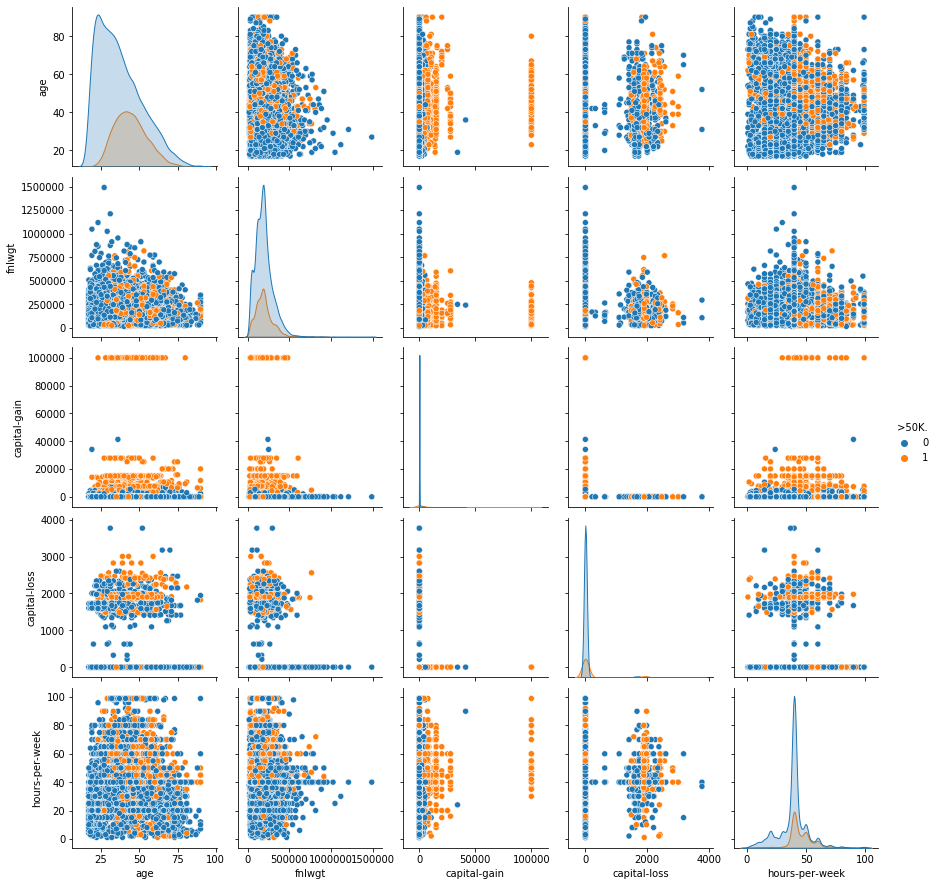

In [365]:
sns.pairplot(vars=df4_test.columns[:-1], data=df4_test, hue=df4_test.columns[-1]) 

In [372]:
df3_dum_all = pd.concat([df3_work,df3_edu,df3_mar,df3_rel,df3_race,df3_sex,df3[' >50K']],axis=1)
t_df3_dum_all = pd.concat([t_df3_work,t_df3_edu,t_df3_mar,t_df3_rel,t_df3_race,t_df3_sex,df3_test[' >50K.']],axis=1)
print(df3_dum_all.shape)
print(t_df3_dum_all.shape)

(32561, 39)
(16282, 39)


In [370]:
df3.columns[-1]

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       ' >50K'],
      dtype='object')

In [ ]:
for row in df3.columns:
    df3[row].plot(kind)

In [382]:
table = df3_dum_all.groupby(' >50K').mean()
table

,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
>50K,,,,,,,,,,,,,,,,,,,,,
0,0.059709,0.000283,0.717354,0.019984,0.073503,0.038228,0.000566,0.045105,0.016181,0.006553,...,0.301335,0.038188,0.202306,0.130583,0.033293,0.030866,0.110720,0.009951,0.837338,0.611974
1,0.078689,0.000000,0.632955,0.079327,0.092335,0.045020,0.000000,0.007652,0.004209,0.000765,...,0.109170,0.004719,0.008545,0.027803,0.095013,0.035200,0.049356,0.003188,0.907665,0.849637


In [383]:
table.columns

Index(['workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'race_ Asian-Pac-Island

workclass_ Local-gov


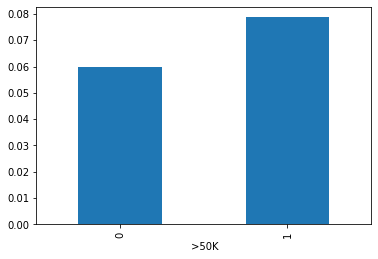

workclass_ Never-worked


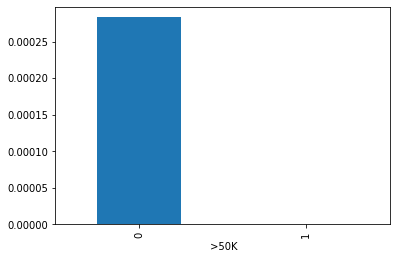

workclass_ Private


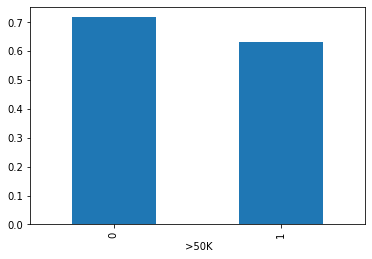

workclass_ Self-emp-inc


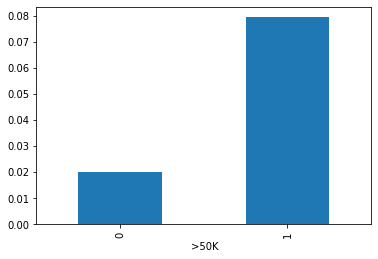

workclass_ Self-emp-not-inc


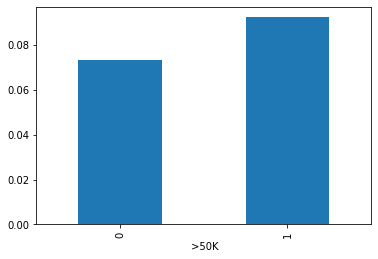

workclass_ State-gov


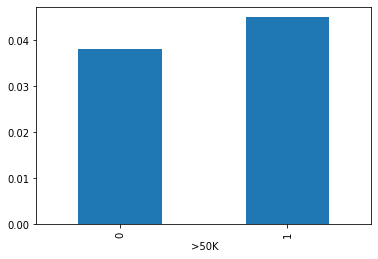

workclass_ Without-pay


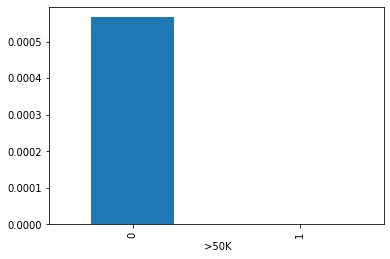

education_ 11th


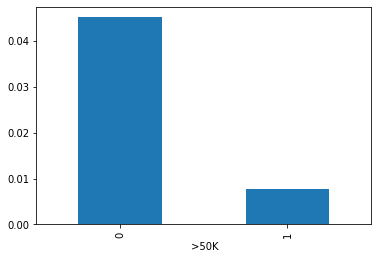

education_ 12th


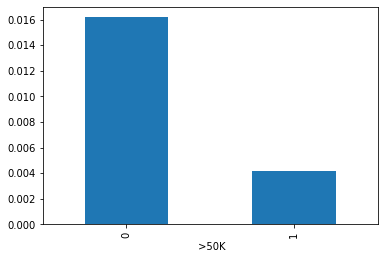

education_ 1st-4th


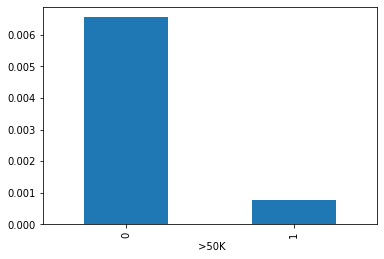

education_ 5th-6th


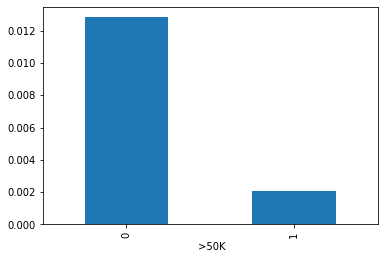

education_ 7th-8th


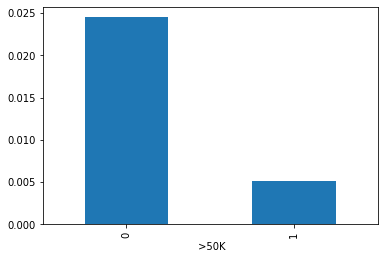

education_ 9th


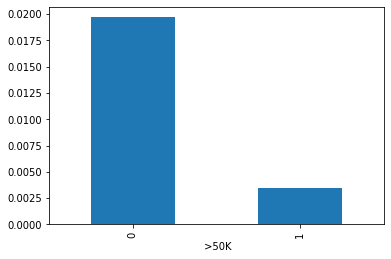

education_ Assoc-acdm


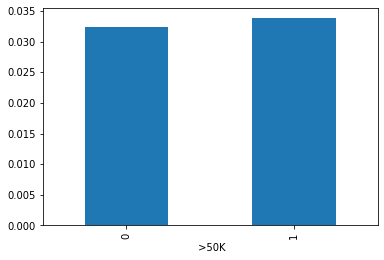

education_ Assoc-voc


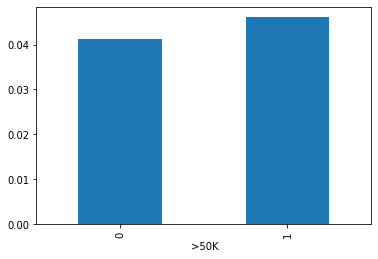

education_ Bachelors


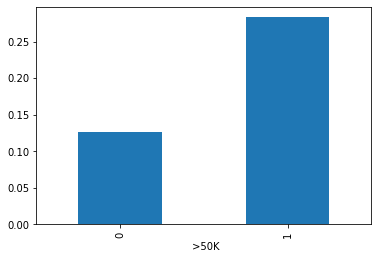

education_ Doctorate


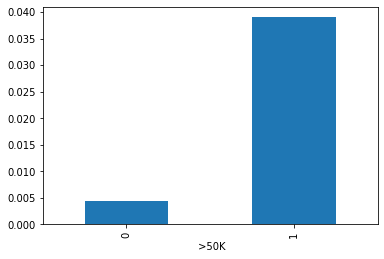

education_ HS-grad


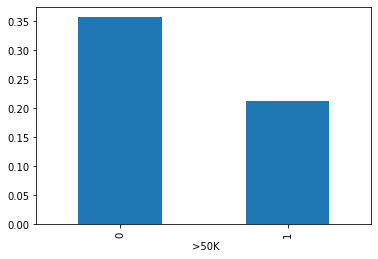

education_ Masters


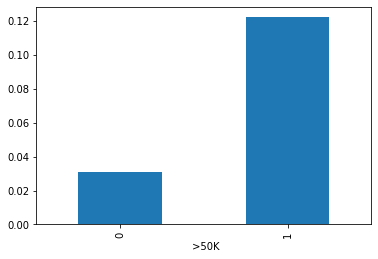

education_ Preschool


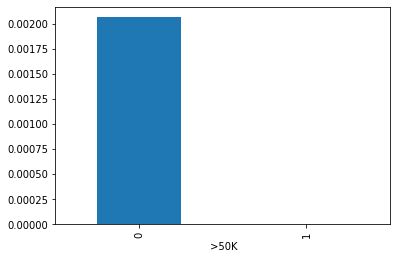

education_ Prof-school


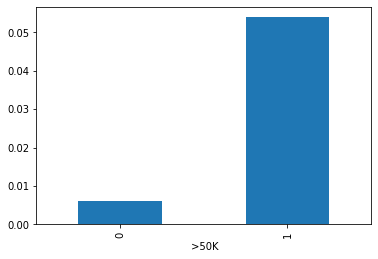

education_ Some-college


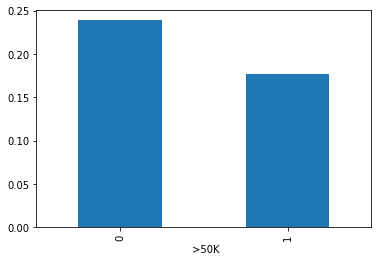

marital-status_ Married-AF-spouse


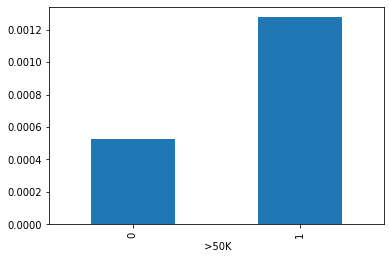

marital-status_ Married-civ-spouse


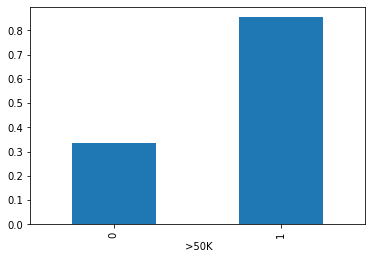

marital-status_ Married-spouse-absent


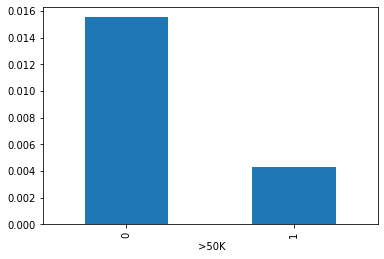

marital-status_ Never-married


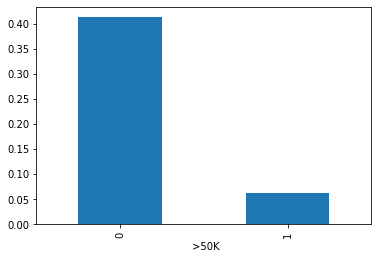

marital-status_ Separated


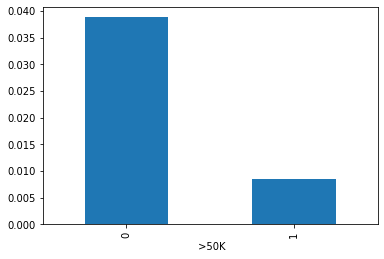

marital-status_ Widowed


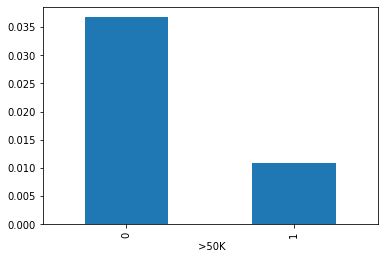

relationship_ Not-in-family


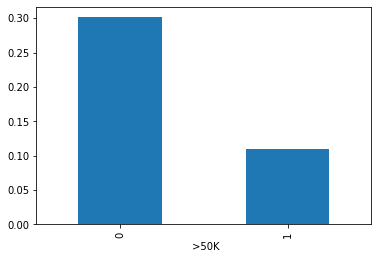

relationship_ Other-relative


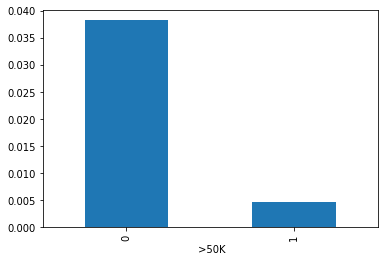

relationship_ Own-child


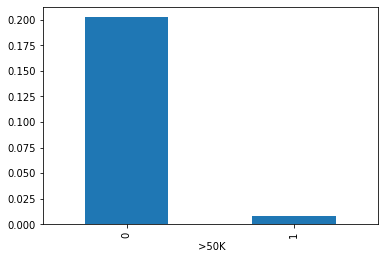

relationship_ Unmarried


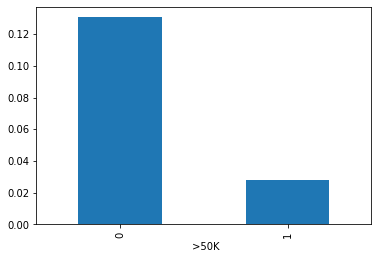

relationship_ Wife


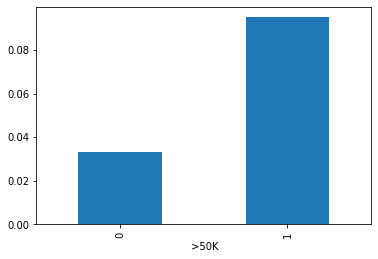

race_ Asian-Pac-Islander


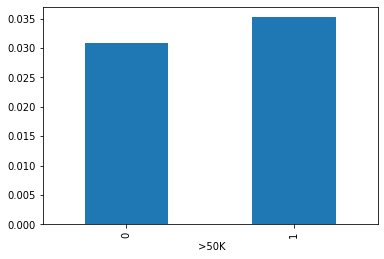

race_ Black


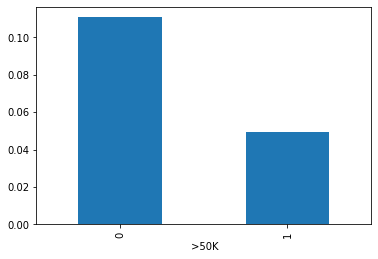

race_ Other


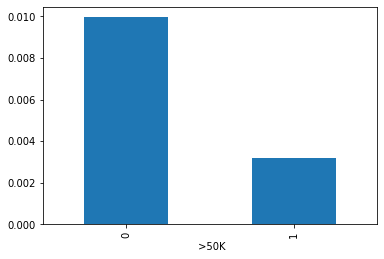

race_ White


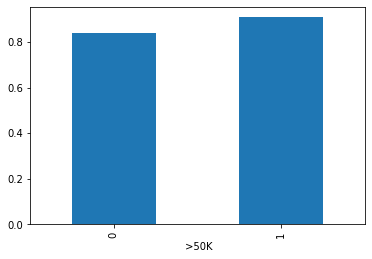

sex_ Male


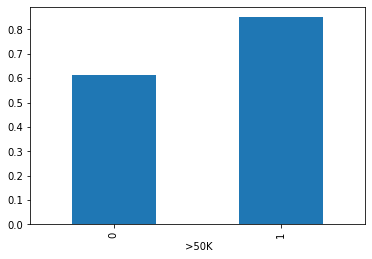

In [386]:
for row in table.columns:
    print(row)
    table[row].plot(kind='bar')
    plt.show()

In [382]:
for row in table.columns:
    table = df3_dum_all.groupby(row).mean()
    table[row].plot(kind='bar')
    plt.show()

,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
>50K,,,,,,,,,,,,,,,,,,,,,
0,0.059709,0.000283,0.717354,0.019984,0.073503,0.038228,0.000566,0.045105,0.016181,0.006553,...,0.301335,0.038188,0.202306,0.130583,0.033293,0.030866,0.110720,0.009951,0.837338,0.611974
1,0.078689,0.000000,0.632955,0.079327,0.092335,0.045020,0.000000,0.007652,0.004209,0.000765,...,0.109170,0.004719,0.008545,0.027803,0.095013,0.035200,0.049356,0.003188,0.907665,0.849637


In [383]:
table.columns

Index(['workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'race_ Asian-Pac-Island

workclass_ Local-gov


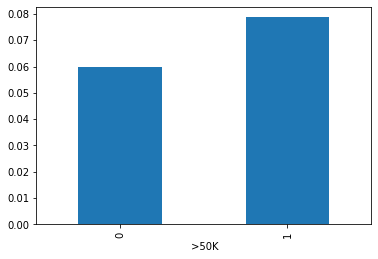

workclass_ Never-worked


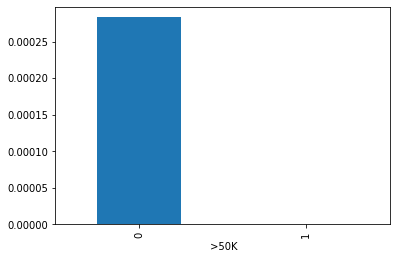

workclass_ Private


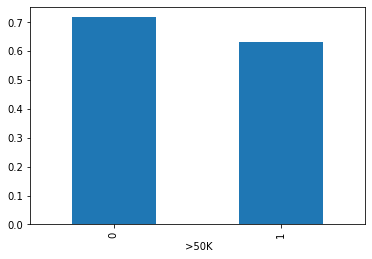

workclass_ Self-emp-inc


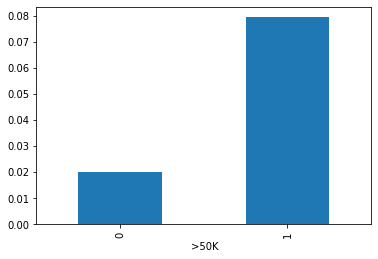

workclass_ Self-emp-not-inc


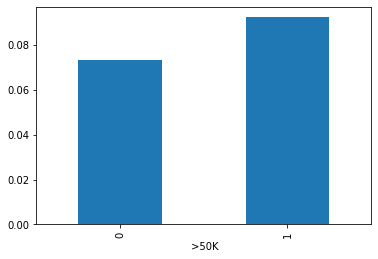

workclass_ State-gov


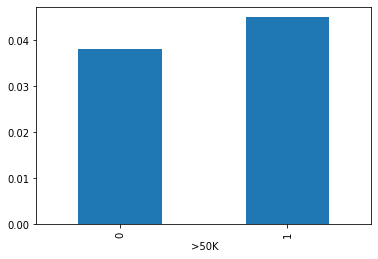

workclass_ Without-pay


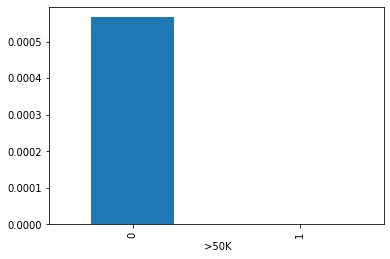

education_ 11th


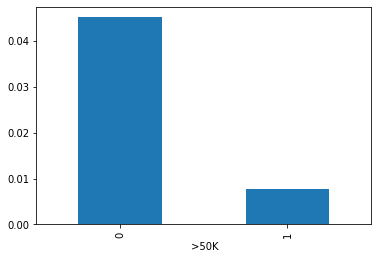

education_ 12th


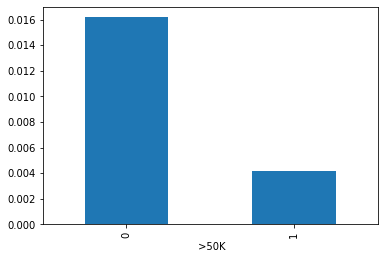

education_ 1st-4th


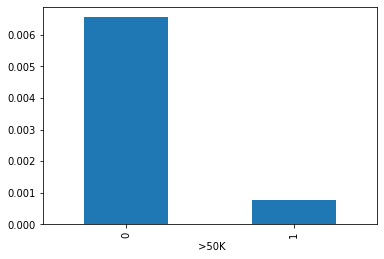

education_ 5th-6th


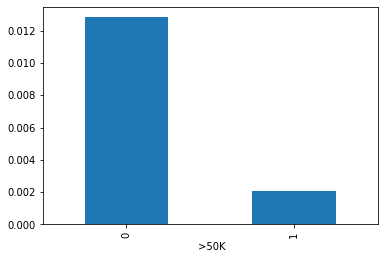

education_ 7th-8th


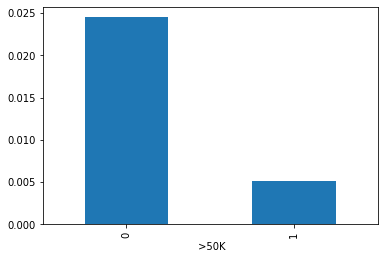

education_ 9th


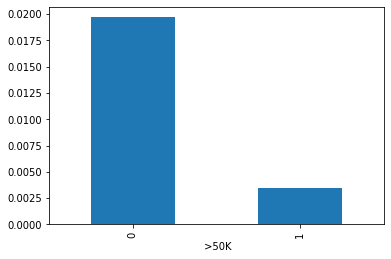

education_ Assoc-acdm


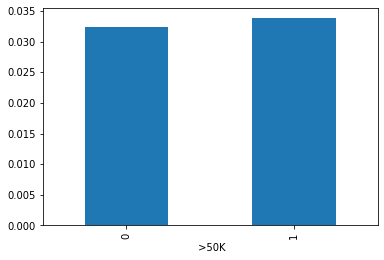

education_ Assoc-voc


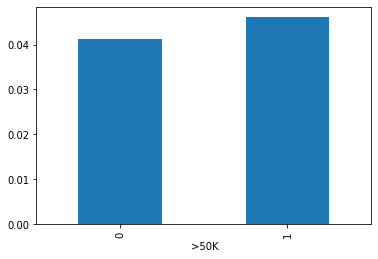

education_ Bachelors


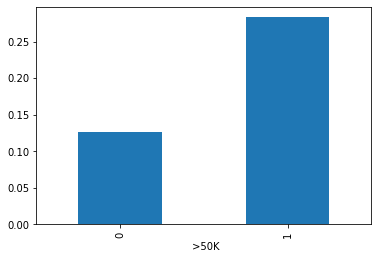

education_ Doctorate


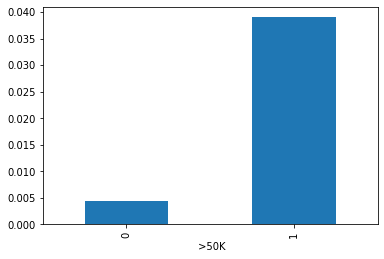

education_ HS-grad


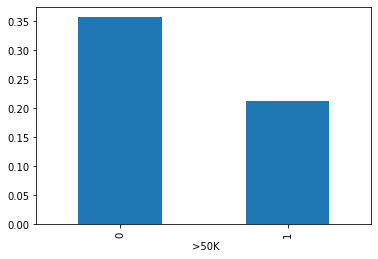

education_ Masters


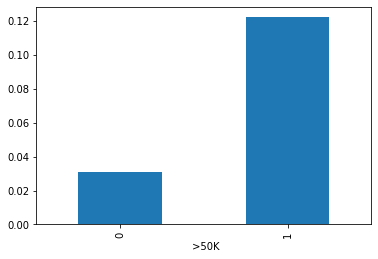

education_ Preschool


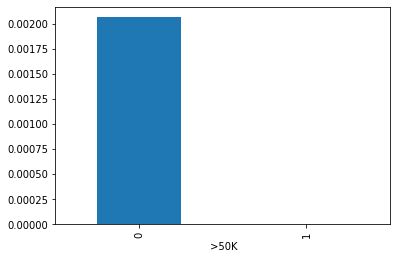

education_ Prof-school


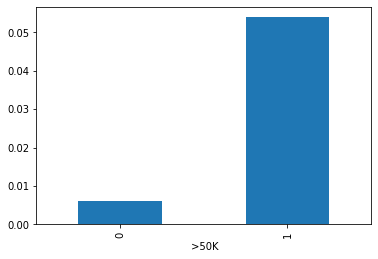

education_ Some-college


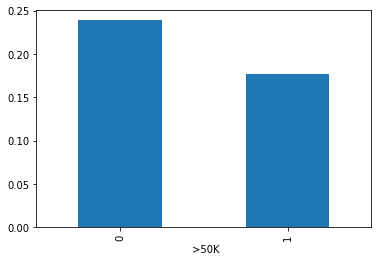

marital-status_ Married-AF-spouse


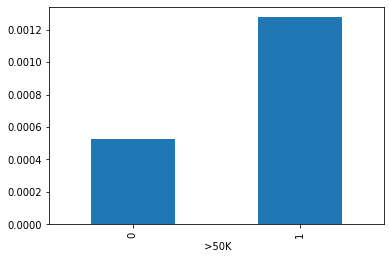

marital-status_ Married-civ-spouse


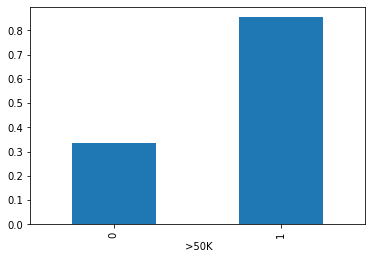

marital-status_ Married-spouse-absent


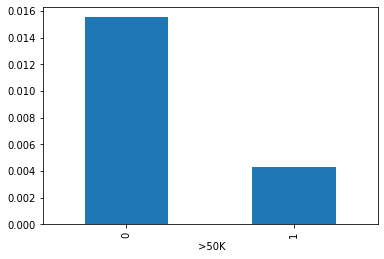

marital-status_ Never-married


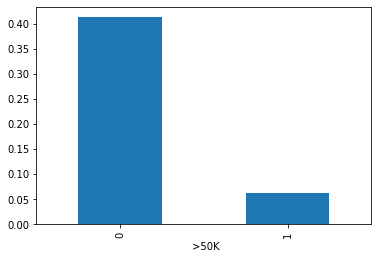

marital-status_ Separated


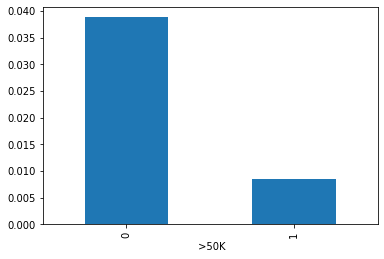

marital-status_ Widowed


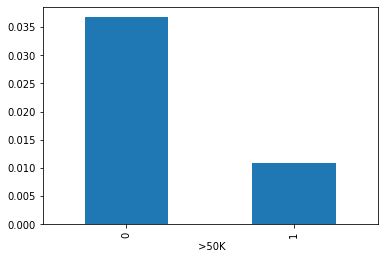

relationship_ Not-in-family


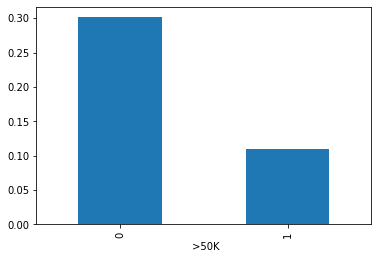

relationship_ Other-relative


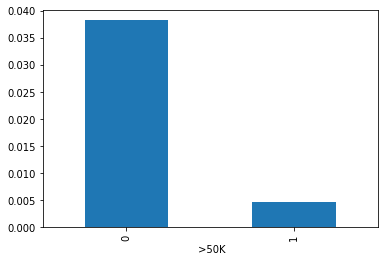

relationship_ Own-child


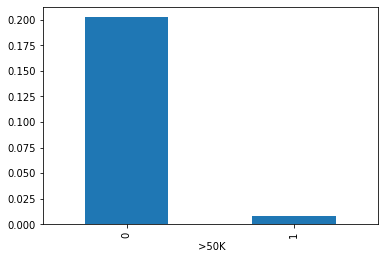

relationship_ Unmarried


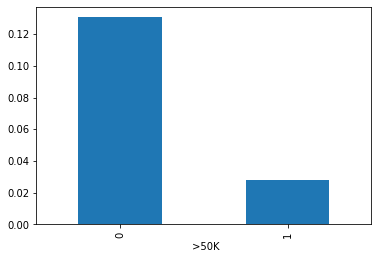

relationship_ Wife


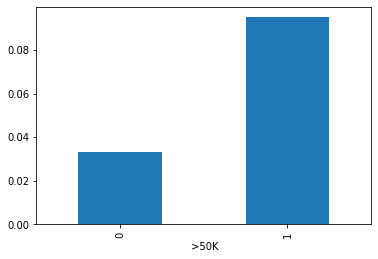

race_ Asian-Pac-Islander


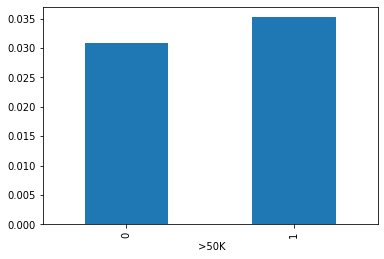

race_ Black


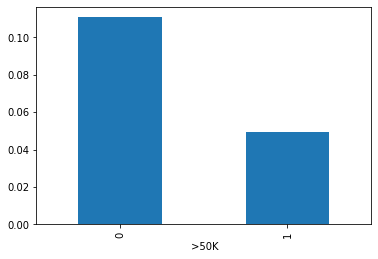

race_ Other


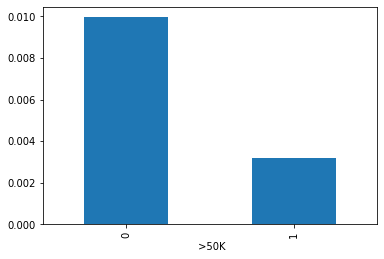

race_ White


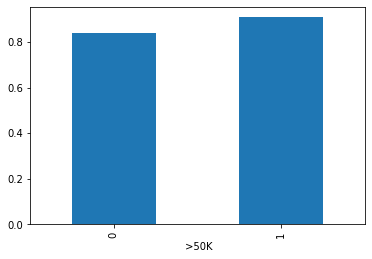

sex_ Male


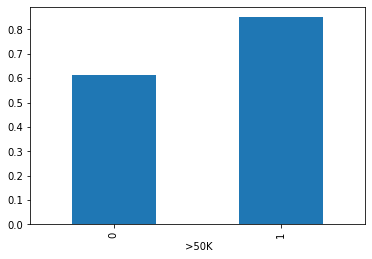

In [386]:
for row in table.columns:
    print(row)
    table[row].plot(kind='bar')
    plt.show()